In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


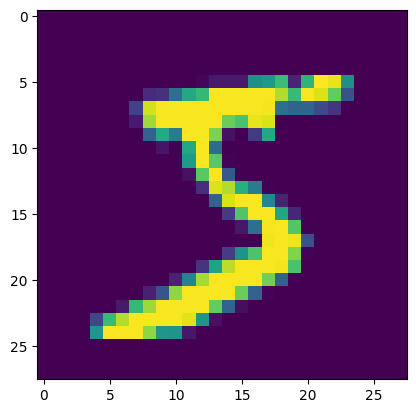

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
#Creating the ANN
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
#Whenever there is more than one layer in the output layer we use softmax
model.add(Dense(10,activation="softmax"))  

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam")

In [30]:
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0126 - val_loss: 0.0943
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0124 - val_loss: 0.1047
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0086 - val_loss: 0.1015
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0059 - val_loss: 0.1077
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0991
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0046 - val_loss: 0.1017
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0075 - val_loss: 0.1108
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0060 - val_loss: 0.1075
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0020 - val_loss: 0.1075
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.007

In [31]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[1.1412925e-20, 1.2140425e-20, 1.7926440e-13, ..., 9.9999994e-01,
        1.0804290e-15, 6.2429791e-14],
       [1.1084230e-10, 4.4193960e-09, 9.9999994e-01, ..., 1.8344241e-24,
        2.7588695e-13, 1.7278862e-28],
       [1.3081317e-10, 9.9998540e-01, 4.8774375e-08, ..., 1.3352823e-05,
        2.5094701e-07, 3.3014003e-10],
       ...,
       [8.3377449e-29, 1.0326358e-25, 1.7939181e-26, ..., 9.1257882e-13,
        3.2855328e-16, 6.6782711e-11],
       [9.5180571e-19, 2.2572669e-24, 1.3040992e-26, ..., 9.3681033e-18,
        7.5701792e-09, 3.8994475e-17],
       [4.5790599e-19, 7.9878611e-22, 1.3372350e-14, ..., 3.8212503e-27,
        1.8043024e-18, 3.8422038e-23]], dtype=float32)

In [32]:
y_prob=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [33]:
y_pred= y_prob.argmax(axis=1)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_test,y_pred)

0.9781

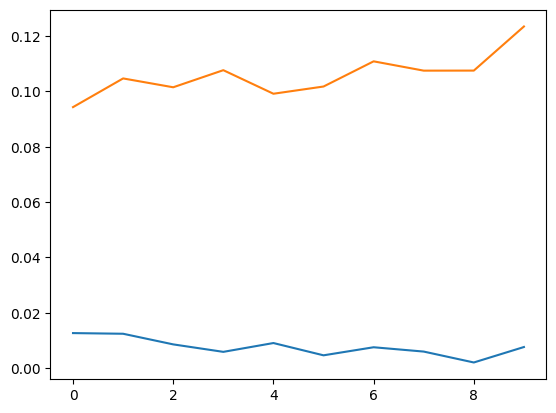

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])